In [ ]:
"""
maxs, minx, avgs = -10*np.ones((3,)), 10*np.ones((3,)), np.zeros((3,))
counter = 0

for (r,c) in tqdm(data_manip.scan_pairs()):
    segds = get_create_ss(r)
    for k,v in segds.items():
        _, _, l = get_bb_info(v[2], None)

        maxs = np.max(np.stack([maxs,l]), axis=0)
        mins = np.max(np.stack([maxs,l]), axis=0)
        avgs += l
        counter += 1
    
    segds = get_create_ss(c)
    for k,v in segds.items():
        _, _, l = get_bb_info(
            v[2], 
            process_transform(data_manip.find_chg_scan(r,c)['transform']))

        maxs = np.max(np.stack([maxs,l]), axis=0)
        mins = np.max(np.stack([maxs,l]), axis=0)
        avgs += l
        counter += 1

print(maxs, mins, avgs/counter, counter)
print((avgs/counter) * 1.2)
"""

In [44]:
ACTIONS_CAT = list(set([
    'added',
    'removed',
    'closed',
    'open',
    'rotated', #rotated w no movement
    'shifted', #moved w no rotation
    'moved', #both rotated&shifted
    'tidied up',
    'cluttered',
    'rearranged', #ie objects on wall or on table --> wall/table
    'decorated'
])) # only decorated cannot be flipped - rearranged can be flipped w itself

len(ACTIONS_CAT)

11

In [27]:
from IPython.display import clear_output
from misc_utils import get_available_device
from DataManipulator import DataManipulator

data_path = '../3Rscan/data'
cap_path = '../manual-captions/'
l_rate = .001
b_size = 2
epochs = 5
metrics = 100
ssize = 75000
hidden_size = 256
embed_size = 512
num_layers = 2
encoder = 'pointnet2'
device = get_available_device()
data_manip = DataManipulator(data_path)

clear_output()

In [14]:
captions = data_manip.create_captions_dict(cap_path)

In [2]:
chg = '8eabc45c-5af7-2f32-85b8-7cb0efc7372d'
chg_scan, ref = data_manip.find_chg_scan_from(chg)

In [48]:
import baseline_utils
from importlib import reload

reload(baseline_utils)

from baseline_utils import *

In [4]:
seq_path_r = '/Users/danich/Downloads/41385847-a238-2435-838b-61864922c518/old_sequence/'
seq_path_c = '/Users/danich/Downloads/8eabc45c-5af7-2f32-85b8-7cb0efc7372d/old_sequence/'

new_seq_path_r = '/Users/danich/Downloads/41385847-a238-2435-838b-61864922c518/sequence/'
new_seq_path_c = '/Users/danich/Downloads/8eabc45c-5af7-2f32-85b8-7cb0efc7372d/sequence/'

vis_r, bboxes_r, poses_r = get_visibility_bb_from_seq_path(seq_path_r)
vis_c, bboxes_c, poses_c = get_visibility_bb_from_seq_path(seq_path_c)

In [7]:
score_dict_r = get_score_dict(vis_r, bboxes_r, poses_r)
score_dict_c = get_score_dict(vis_c, bboxes_c, poses_c)

In [16]:
scores = sorted(score_dict_r[1], key=lambda x: x['score'], reverse=True)

In [34]:
failures = []

for c_dt in captions:
    if c_dt['ref'] == ref and c_dt['chg'] == chg: # TO REMOVE
        out_1 = create_baseline_data(
            ref=True,
            c_dt=c_dt,
            score_dict=score_dict_r,
            seq_path_a=seq_path_r,
            seq_path_b=seq_path_c,
            new_seq_path_b=new_seq_path_c,
            cap_path=cap_path,
            chg_scan=chg_scan
        )

        out_2 = create_baseline_data(
            ref=False,
            c_dt=c_dt,
            score_dict=score_dict_c,
            seq_path_a=seq_path_c,
            seq_path_b=seq_path_r,
            new_seq_path_b=new_seq_path_r,
            cap_path=cap_path,
            chg_scan=chg_scan
        )

        if (not out_1) or (not out_2):
            failures.append(c_dt)

print(failures)

[]


In [178]:
import matplotlib.pyplot as plt

In [40]:
for c_dt in captions:
    if c_dt['action'] == 'added' and c_dt['id'] == 62 and c_dt['ref'] == ref and c_dt['chg'] == chg:
        break

In [41]:
c_dt

{'label': 'pillow',
 'action': 'added',
 'id': 62,
 'ref': '41385847-a238-2435-838b-61864922c518',
 'chg': '8eabc45c-5af7-2f32-85b8-7cb0efc7372d',
 'dir': 'XX 8eabc45c-5af7-2f32-85b8-7cb0efc7372d'}

In [42]:
os.listdir(os.path.join(cap_path, c_dt['dir'], get_action_key_from_dt(c_dt), 'baseline', 'ref'))

['bb_0.txt',
 'bb_1.txt',
 'img_path_9.txt',
 'bb_3.txt',
 'bb_2.txt',
 'img_path_8.txt',
 'bb_6.txt',
 'bb_7.txt',
 'bb_5.txt',
 'bb_4.txt',
 'img_path_3.txt',
 'bb_9.txt',
 'bb_8.txt',
 'img_path_2.txt',
 'img_path_0.txt',
 'img_path_1.txt',
 'img_path_5.txt',
 'img_path_4.txt',
 'img_path_6.txt',
 'img_path_7.txt']

In [36]:
chg

'8eabc45c-5af7-2f32-85b8-7cb0efc7372d'

In [46]:
baseline_meta = get_baselines_meta_from_c_dt(c_dt, cap_path, 1)


ref_bb_img = get_bb_img(
    image_path=baseline_meta['ref']['img_path'],
    bb_s=baseline_meta['ref']['bb'],
)

chg_bb_img = get_bb_img(
    image_path=baseline_meta['chg']['img_path'],
    bb_s=baseline_meta['chg']['bb']
)

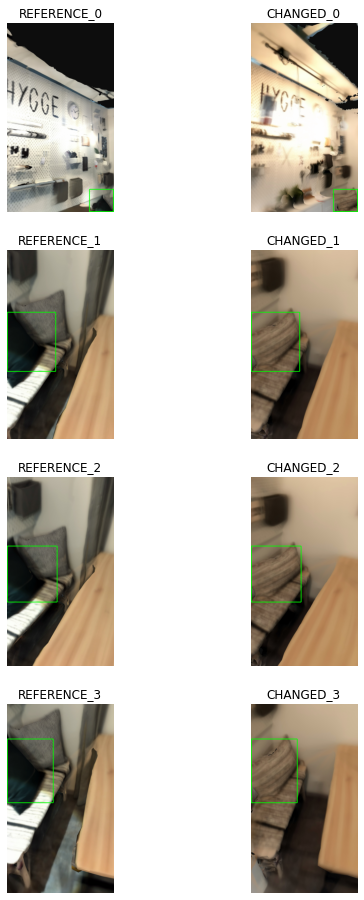

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,16))

tot = 4
for i in range(4):
    ref_bb_img, chg_bb_img = get_bb_image_pair_from_c_dt(c_dt, cap_path, i)

    ax = plt.subplot2grid((tot,2), (i,0))
    ax.imshow(ref_bb_img)
    ax.axis('off')
    ax.set_title(f'REFERENCE_{i}')

    ax = plt.subplot2grid((tot,2), (i,1))
    ax.imshow(chg_bb_img)
    ax.axis('off')
    ax.set_title(f'CHANGED_{i}')